### aim: recreate corinne's ferret c14 code in python

Notes here: https://satin-mascara-327.notion.site/Analysing-14C-079ef1a8ccb24e8f86c714d53d865f8c

### date: 

    code:
    `! upload mask 
    use "/gpfs/data/greenocean/mesh_mask_v2.3.nc"

    ! upload climate runs 
    use "/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_qtr_c14.nc"
    use "/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_Cflx.nc"

    ! upload control run 
    use "/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_qtr_c14.nc"
    use "/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_Cflx.nc"
    !
    ! upload the vertical gradient in 14C and DIC
    use "/gpfs/home/e415/scratch/TOM5_CE_C14c/dc14dz.nc"

    !def axis/t=16-jan-1950:31-dec-2015/np=792 newgrid
    def axis/t=16-jan-1950:31-dec-2014/np=780 newgrid

    ! define axis for label 
    def axis/t=1950:2014/np=780 aforlabel

    ! define grid variables 
    let area = e1t[d=1,l=1,k=1]*e2t[d=1,l=1,k=1] ! in m2
    let tarea = area[i=@sum,j=@sum,d=1] ! in m2
    let vol = area[d=1] * e3t_0[d=1] ! in m3 

    define viewport /xlim=0.25,0.85/ylim=0.56,1.0 u3w
    define viewport /xlim=0.25,0.85/ylim=0.28,0.72 m3w
    define viewport /xlim=0.25,0.85/ylim=0.0,0.44 l3w

    ppl tics 0.125,0.30,0.125,0.30,1,1
    ppl axnmtc 1,1
    ppl axlint 1,1
    ppl axnsig 1,1
    ppl axset 1,1,1,1
    ppl axlsze 0.12, 0.12
    ppl pen,7

    ! 
    ! regrid the time because there was a problem with the time stamp in the netcdf file
    ! Tereza, this step should not be necessary if your netcdf files are written in the standard way
    !
    let qtrnewt = qtr_c14[gt=newgrid@asn]*tmask[d=1,l=1,k=1]
    let cflxnewt = cflx[gt=newgrid@asn]*tmask[d=1,l=1,k=1] 
    let dc14dznewt = dc14dz[gt=newgrid@asn] 
    let ddicdznewt = ddicdz[gt=newgrid@asn] 
    ! 

    ! Flux 
    ! convert Orr-units for 14C flux tracer c14b to units of mol per year 
    ! see explanation in Orr et al GBC 2001; the c14b-ratio is used as a concentration
    ! first factor 1/10 below divides by the upper level depth to obtain units of Orr-units/s, 
    ! then use the same factors as for the concentration 
    let qtrflx = (qtrnewt/10)*2.*1e-14*vol[l=1]*3.156e7

    ! Flux 
    ! now convert CO2 flux to units of mols per year  
    let cflxint = cflxnewt*area[l=1]*3.156e7 

    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    !
    ! Plot figures
    !
    can vie
    set vie world

    ! plot the 14C flux 
    set vie u3w
    plot/line=3/nol/ylim=-2:8:2/xlim=01-jan-1950:31-dec-2016 qtrflx[d=2,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*6.023e23*1e-26 
    plot/line=4/nol/o/xlim=01-jan-1950:31-dec-2016 qtrflx[d=4,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*6.023e23*1e-26 
    label 1950 8.3 -1 0 0.12 "a) Climate (green) and control (blue) simulations, ^1^4C" 

    ! plot the CO2 flux
    set vie m3w
    plot/line=3/nol/ylim=0:1.5:0.4/xlim=01-jan-1950:31-dec-2016 cflxint[d=3,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*12e-15 
    plot/line=4/nol/o/xlim=01-jan-1950:31-dec-2016 cflxint[d=5,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*12e-15 
    label 1950 1.65 -1 0 0.12 "b) Climate (green) and control (blue) simulations, CO_2" 

    ! plot all labels
    ppl axset 0,0,0,0
    ppl axlsze 0.,0.
    plot/nol/ylim=-1:1/xlim=1950:2017 cflxint[d=5,i=@sum,j=1:47@sum,k=1,gt=aforlabel@asn]*0+1000 
    label 1940 2.5 0 90 0.12 "^1^4C flux (10^2^6 atoms/yr)" 
    label 1940 0.1 0 90 0.12 "CO_2 flux (PgC/yr)" 
    label 1940 -2.5  0 90 0.12 "Difference (units as above)" 
    label 1985 -2.25 0 0 0.12 "^1^4C (black)"  
    label 1994 -3.4 0 0 0.12 "CO_2 (red)" 
    label 2073 2.0 0 0 0.12 "Well. minus Cam. (turquoise)"  
    label 1975 0.55 0 0 0.12 "Climate (green), control (blue)"
    label 1975 2.00 0 0 0.12 "Climate (green), control (blue)" 
    !
    ppl axset 1,1,1,1
    ppl axlsze 0.12, 0.12

    ! plot the difference between the full run (RUN A) and the constant climate run (RUN C)
    set vie l3w 
    ! non-normalised to changing d14C/dz*(-1)
    plot/nol/ylim=-0.28:0.28:0.1/xlim=01-jan-1950:31-dec-2016 (qtrflx[d=2,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*6.023e23*1e-26 - qtrflx[d=4,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*6.023e23*1e-26)*(-1)  
    label 1950 0.32 -1 0 0.12 "c) Difference, ^1^4C*(-1) & CO_2, not normalised (r=0.58)" 

    plot/line=2/nol/o/ylim=-0.5:0.5/xlim=01-jan-1950:31-dec-2016 cflxint[d=3,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*12e-15 - cflxint[d=5,i=@sum,j=1:47@sum,k=1,l=@sbx:12]*12e-15 




`

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
# code:
# `! upload mask 
# use "/gpfs/data/greenocean/mesh_mask_v2.3.nc"
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

In [5]:
# ! upload climate runs 
# use "/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_qtr_c14.nc"
# use "/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_Cflx.nc"

# ! upload control run 
# use "/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_qtr_c14.nc"
# use "/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_Cflx.nc"
# !
# ! upload the vertical gradient in 14C and DIC
# use "/gpfs/home/e415/scratch/TOM5_CE_C14c/dc14dz.nc"

#climate run
C14d_qtr_c14 = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_qtr_c14.nc')
C14d_Cflx = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_Cflx.nc')
#control run 
C14c_qtr_c14 = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_qtr_c14.nc')
C14c_Cflx = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_Cflx.nc')
#vertical gradient:
dc14dz  = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/dc14dz.nc')

In [7]:
# let area = e1t[d=1,l=1,k=1]*e2t[d=1,l=1,k=1] ! in m2
# let tarea = area[i=@sum,j=@sum,d=1] ! in m2
# let vol = area[d=1] * e3t_0[d=1] ! in m3 

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['area'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
area = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tarea = area

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['area'].values
vol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

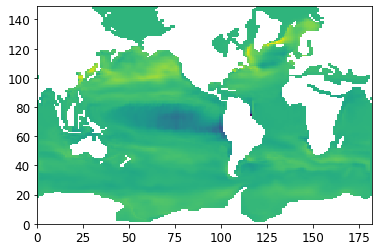

In [34]:
plt.pcolormesh(cflx_ar[0,:,:])

In [39]:
cflx_file

<xarray.Dataset>
Dimensions:       (time_counter: 780, x: 182, y: 149)
Coordinates:
  * time_counter  (time_counter) object 1978-01-16 04:48:00 ... 2042-12-16 14...
Dimensions without coordinates: x, y
Data variables:
    Cflx          (time_counter, y, x) float32 nan nan nan nan ... nan nan nan
Attributes:
    Conventions:               GDT 1.3
    file_name:                 ORCA2_1m_19500101_19501231_dia2d_T_0000.nc
    production:                An IPSL model
    TimeStamp:                 2016-JUN-08 09:41:51 GMT+0100
    associate_file:            ORCA2_1m_19500101_19501231_icemod_0000.nc ORCA...
    history:                   Mon Jun 13 13:24:39 2016: ncrcat -v Cflx C14f_...
    nco_openmp_thread_number:  1

In [41]:
datetimeindex = cflx_file.indexes['time_counter'].to_datetimeindex()

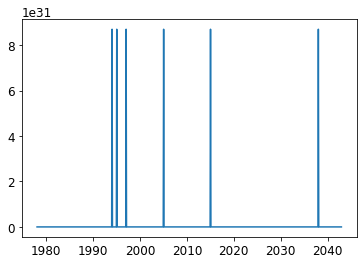

In [42]:
cflx_ar = cflx_file.Cflx * area
w = np.nansum(np.nansum(cflx_ar[:,:,:], axis = 2),axis =1)
np.shape(w)
plt.plot(datetimeindex,w)

In [8]:
w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_GEA0/ORCA2_1m_20160101_20161231_diad_T.nc')

## preprocess variables - equivalent of nrcat

IndexError: too many indices

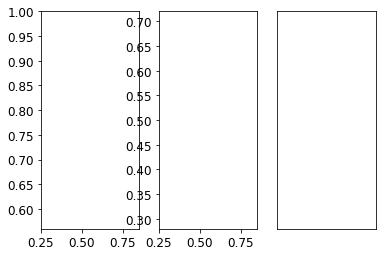

In [21]:

import datetime as dt

# Upload mask
mask = xr.open_dataset('/gpfs/data/greenocean/mesh_mask_v2.3.nc')

# Upload climate runs
c14_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_qtr_c14.nc')
cflx_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_Cflx.nc')

# Upload control run
c14_control_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_qtr_c14.nc')
cflx_control_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_Cflx.nc')

# Upload the vertical gradient in 14C and DIC
dc14dz_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/dc14dz.nc')

# Define time axis for newgrid
start_date = dt.datetime(1950, 1, 16)
end_date = dt.datetime(2014, 12, 31)
time_axis = np.arange(start_date, end_date, dt.timedelta(days=1))

# Define axis for label
aforlabel_axis = np.arange(1950, 2015)

# Define grid variables
e1t = mask.variables['e1t'][0, 0, 0] 
e2t = mask.variables['e2t'][0, 0, 0]
area = e1t * e2t
tarea = np.sum(area)
vol = area * mask.variables['e3t_0'][0]

# Define viewports
plt.figure()
plt.subplot(131)
plt.xlim(0.25, 0.85)
plt.ylim(0.56, 1.0)
plt.subplot(132)
plt.xlim(0.25, 0.85)
plt.ylim(0.28, 0.72)
plt.subplot(133)
plt.xlim(0.25, 0.85)
plt.ylim(0.0, 0.44)

# Plot settings
plt.xticks(np.arange(0.125, 0.30, 0.125))
plt.yticks(np.arange(0.125, 0.30, 0.125))
plt.axis([1, 1, 1, 1])
plt.tick_params(labelsize=7)

###regrid here
qtrnewt = c14_file.variables['qtr_c14'][:] * mask.variables['tmask'][0, 0, 0]
cflxnewt = cflx_file.variables['Cflx'][:] * mask.variables['tmask'][0, 0, 0]
dc14dznewt = dc14dz_file.variables['DC14DZ'][:] 
ddicdznewt = dc14dz_file.variables['DDICDZ'][:] 

# Flux conversion
qtrflx = (qtrnewt / 10) * 2. * 1e-14 * vol[0] * 3.156e7
cflxint = cflxnewt * area * 3.156e7



In [25]:
e1t = mask.variables['e1t'][0, 0, 0] 
e2t = mask.variables['e2t'][0, 0, 0]
area = e1t * e2t
tarea = np.sum(area)

In [23]:
vol

<xarray.Variable (z: 31)>
array([2.07163834e+10, 2.07180162e+10, 2.07211963e+10, 2.07273904e+10,
       2.07394546e+10, 2.07629517e+10, 2.08087147e+10, 2.08978369e+10,
       2.10713784e+10, 2.14092213e+10, 2.20666055e+10, 2.33445780e+10,
       2.58245232e+10, 3.06201693e+10, 3.98315801e+10, 5.72979356e+10,
       8.96211933e+10, 1.46831908e+11, 2.40535479e+11, 3.76102758e+11,
       5.40769309e+11, 7.03100935e+11, 8.33330569e+11, 9.21602046e+11,
       9.74812677e+11, 1.00465035e+12, 1.02070640e+12, 1.02915515e+12,
       1.03354860e+12, 1.03581917e+12, 1.03698888e+12])

In [26]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
# csize_broad = np.zeros([31,149,182])
# for i in range(0,31):
#     csize_broad[i,:,:] = tmesh['csize'].values
# cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

In [ ]:
# Plot 14C flux
plt.subplot(131)
print(time_axis)
print()
# plt.plot(time_axis, np.sum(np.sum(qtrflx[1, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26, linewidth=3, color='green', label='Climate')
# plt.plot(time_axis, np.sum(np.sum(qtrflx[3, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26, linewidth=3, color='blue', label='Control')
# plt.text(1950, 8.3, 'a) Climate (green) and control (blue) simulations, ^14C', fontsize=12)

# # Plot CO2 flux
# plt.subplot(132)
# plt.plot(time_axis, np.sum(np.sum(cflxint[2, :, :, :], axis=1), axis=0) * 12e-15, linewidth=3, color='green', label='Climate')
# plt.plot(time_axis, np.sum(np.sum(cflxint[4, :, :, :], axis=1), axis=0) * 12e-15, linewidth=3, color='blue', label='Control')
# plt.text(1950, 1.65, 'b) Climate (green) and control (blue) simulations, CO_2', fontsize=12)

# # Plot labels
# plt.axis([0, 0, 0, 0])
# plt.text(1940, 2.5, '^14C flux (10^26 atoms/yr)', rotation=90, fontsize=12)
# plt.text(1940, 0.1, 'CO_2 flux (PgC/yr)', rotation=90, fontsize=12)
# plt.text(1940, -2.5, 'Difference (units as above)', rotation=90, fontsize=12)
# plt.text(1985, -2.25, '^14C (black)', fontsize=12)
# plt.text(1994, -3.4, 'CO_2 (red)', fontsize=12)
# plt.text(2073, 2.0, 'Well. minus Cam. (turquoise)', fontsize=12)
# plt.text(1975, 0.55, 'Climate (green), control (blue)', fontsize=12)
# plt.text(1975, 2.0, 'Climate (green), control (blue)', fontsize=12)

# # Plot difference between full run (RUN A) and constant climate run (RUN C)
# plt.subplot(133)
# diff_c14 = (np.sum(np.sum(qtrflx[1, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26 - np.sum(np.sum(qtrflx[3, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26) * (-1)
# diff_co2 = np.sum(np.sum(cflxint[2, :, :, :], axis=1), axis=0) * 12e-15 - np.sum(np.sum(cflxint[4, :, :, :], axis=1), axis=0) * 12e-15
# plt.plot(time_axis, diff_c14, linestyle='-', linewidth=2, color='black', label='^14C*(-1)')
# plt.plot(time_axis, diff_co2, linestyle='-', linewidth=2, color='red', label='CO_2')
# plt.text(1950, 0.32, 'c) Difference, ^14C*(-1) & CO_2, not normalised (r=0.58)', fontsize=12)

# # Display the plot
# plt.show()


In [20]:
# Regrid the time
qtrnewt = c14_file.variables['qtr_c14'][:] * mask.variables['tmask'][0, 0, 0]
cflxnewt = cflx_file.variables['Cflx'][:] * mask.variables['tmask'][0, 0, 0]
dc14dznewt = dc14dz_file.variables['DC14DZ'][:] 
ddicdznewt = dc14dz_file.variables['DDICDZ'][:] 


In [19]:
dc14dz_file

<xarray.Dataset>
Dimensions:           (DEPTHT17_17: 1, TIME_COUNTER: 780, bnds: 2)
Coordinates:
  * DEPTHT17_17       (DEPTHT17_17) float64 216.6
  * TIME_COUNTER      (TIME_COUNTER) object 1978-01-16 04:48:00 ... 2042-12-1...
Dimensions without coordinates: bnds
Data variables:
    DEPTHT17_17_bnds  (DEPTHT17_17, bnds) float64 ...
    DC14DZ            (TIME_COUNTER, DEPTHT17_17) float32 ...
    DDICDZ            (TIME_COUNTER, DEPTHT17_17) float32 ...
Attributes:
    history:      FERRET V6.72    4-Jan-18
    Conventions:  CF-1.0

KeyError: 'cflx'

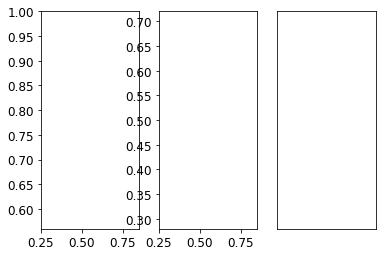

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import netCDF4 as nc

# Upload mask
mask = xr.open_dataset('/gpfs/data/greenocean/mesh_mask_v2.3.nc')

# Upload climate runs
c14_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_qtr_c14.nc')
cflx_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14d/C14d_1950_2014_Cflx.nc')

# Upload control run
c14_control_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_qtr_c14.nc')
cflx_control_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/C14c_1950_2014_Cflx.nc')

# Upload the vertical gradient in 14C and DIC
dc14dz_file = xr.open_dataset('/gpfs/home/e415/scratch/TOM5_CE_C14c/dc14dz.nc')

# Define time axis for newgrid
start_date = dt.datetime(1950, 1, 16)
end_date = dt.datetime(2014, 12, 31)
time_axis = np.arange(start_date, end_date, dt.timedelta(days=1))

# Define axis for label
aforlabel_axis = np.arange(1950, 2015)

# Define grid variables
e1t = mask.variables['e1t'][0, 0, 0]
e2t = mask.variables['e2t'][0, 0, 0]
area = e1t * e2t
tarea = np.sum(area)
vol = area * mask.variables['e3t_0'][0]

# Define viewports
plt.figure()
plt.subplot(131)
plt.xlim(0.25, 0.85)
plt.ylim(0.56, 1.0)
plt.subplot(132)
plt.xlim(0.25, 0.85)
plt.ylim(0.28, 0.72)
plt.subplot(133)
plt.xlim(0.25, 0.85)
plt.ylim(0.0, 0.44)

# Plot settings
plt.xticks(np.arange(0.125, 0.30, 0.125))
plt.yticks(np.arange(0.125, 0.30, 0.125))
plt.axis([1, 1, 1, 1])
plt.tick_params(labelsize=7)
# plt.pen(7)

# # Flux conversion
# qtrflx = (qtrnewt / 10) * 2. * 1e-14 * vol[0] * 3.156e7
# cflxint = cflxnewt * area * 3.156e7

# # Plot 14C flux
# plt.subplot(131)
# plt.plot(time_axis, np.sum(np.sum(qtrflx[1, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26, linewidth=3, color='green', label='Climate')
# plt.plot(time_axis, np.sum(np.sum(qtrflx[3, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26, linewidth=3, color='blue', label='Control')
# plt.text(1950, 8.3, 'a) Climate (green) and control (blue) simulations, ^14C', fontsize=12)

# # Plot CO2 flux
# plt.subplot(132)
# plt.plot(time_axis, np.sum(np.sum(cflxint[2, :, :, :], axis=1), axis=0) * 12e-15, linewidth=3, color='green', label='Climate')
# plt.plot(time_axis, np.sum(np.sum(cflxint[4, :, :, :], axis=1), axis=0) * 12e-15, linewidth=3, color='blue', label='Control')
# plt.text(1950, 1.65, 'b) Climate (green) and control (blue) simulations, CO_2', fontsize=12)

# # Plot labels
# plt.axis([0, 0, 0, 0])
# plt.text(1940, 2.5, '^14C flux (10^26 atoms/yr)', rotation=90, fontsize=12)
# plt.text(1940, 0.1, 'CO_2 flux (PgC/yr)', rotation=90, fontsize=12)
# plt.text(1940, -2.5, 'Difference (units as above)', rotation=90, fontsize=12)
# plt.text(1985, -2.25, '^14C (black)', fontsize=12)
# plt.text(1994, -3.4, 'CO_2 (red)', fontsize=12)
# plt.text(2073, 2.0, 'Well. minus Cam. (turquoise)', fontsize=12)
# plt.text(1975, 0.55, 'Climate (green), control (blue)', fontsize=12)
# plt.text(1975, 2.0, 'Climate (green), control (blue)', fontsize=12)

# # Plot difference between full run (RUN A) and constant climate run (RUN C)
# plt.subplot(133)
# diff_c14 = (np.sum(np.sum(qtrflx[1, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26 - np.sum(np.sum(qtrflx[3, :, :, :], axis=1), axis=0) * 6.023e23 * 1e-26) * (-1)
# diff_co2 = np.sum(np.sum(cflxint[2, :, :, :], axis=1), axis=0) * 12e-15 - np.sum(np.sum(cflxint[4, :, :, :], axis=1), axis=0) * 12e-15
# plt.plot(time_axis, diff_c14, linestyle='-', linewidth=2, color='black', label='^14C*(-1)')
# plt.plot(time_axis, diff_co2, linestyle='-', linewidth=2, color='red', label='CO_2')
# plt.text(1950, 0.32, 'c) Difference, ^14C*(-1) & CO_2, not normalised (r=0.58)', fontsize=12)

# # Display the plot
# plt.show()

In [13]:

# Regrid the time
qtrnewt = c14_file.variables['qtr_c14'][:]# * mask.variables['tmask'][0, 0, 0]
cflxnewt = cflx_file.variables['Cflx'][:] #* mask.variables['tmask'][0, 0, 0]
dc14dznewt = dc14dz_file.variables['dc14dz'][:] 
ddicdznewt = ddicdz_file.variables['ddicdz'][:] 


KeyError: 'dc14dz'

In [14]:
dc14dz_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V6.72    4-Jan-18
    Conventions: CF-1.0
    dimensions(sizes): DEPTHT17_17(1), bnds(2), TIME_COUNTER(780)
    variables(dimensions): float64 DEPTHT17_17(DEPTHT17_17), float64 DEPTHT17_17_bnds(DEPTHT17_17,bnds), float64 TIME_COUNTER(TIME_COUNTER), float32 DC14DZ(TIME_COUNTER,DEPTHT17_17), float32 DDICDZ(TIME_COUNTER,DEPTHT17_17)
    groups: 

In [ ]:
w2